In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Airlines_graph.csv')
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


In [3]:
data.shape

(100, 16)

In [4]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# date
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

data.drop(columns = ['year', 'month', 'day','dep_time','sched_dep_time','arr_time','sched_arr_time'], inplace=True)

In [5]:
data.head()

,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,97.0,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,14.0,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,-3.0,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,7.0,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,-3.0,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05


In [6]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

### Plot the network of airports

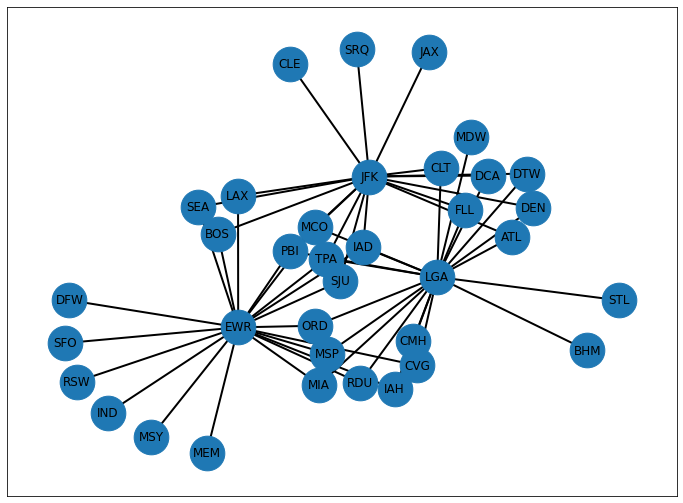

In [7]:
plt.figure(figsize=(12,9))

pos = nx.spring_layout(FG)
nx.draw_networkx_nodes(FG, pos, node_size = 1200)
nx.draw_networkx_edges(FG, pos, width = 2)
nx.draw_networkx_labels(FG, pos, font_size = 12, font_family='sans-serif')
plt.axis('on')
plt.show()

In [8]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [9]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

### The degree centrality for all airports

In [10]:
# The degree centrality for a node v is the fraction of nodes it is connected to.
degree_centrality = nx.algorithms.degree_centrality(FG) 
degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

Text(0, 0.5, 'centrality')

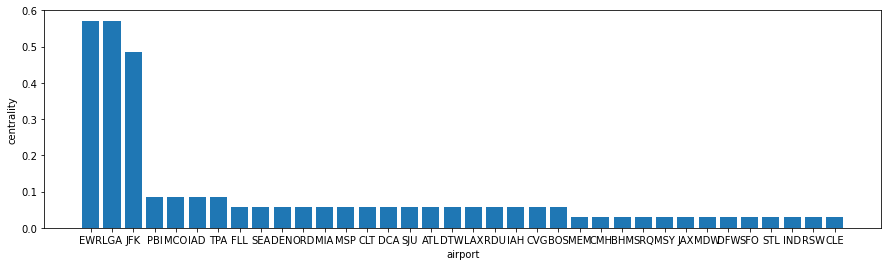

In [11]:
keys = degree_centrality.keys()
values = degree_centrality.values()
plt.figure(figsize=(15,4))
plt.bar(keys, values)
plt.xlabel('airport')
plt.ylabel('centrality')

### Find all the paths available from JAX to DFW

In [12]:
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
    print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

### Find the dijkstra path weighted by airtime (approximate case)

In [13]:
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

### Find the most busiest/popular airport

In [14]:
def find_nodes_with_highest_deg_cent(G):
    
    deg_cent = nx.algorithms.degree_centrality(G)
    deg_cent = dict(sorted(deg_cent.items(), key=lambda item: item[1], reverse=True))
    
    return list(deg_cent.keys())[0]

find_nodes_with_highest_deg_cent(FG)

'EWR'

### Identify 6 new routes to recommend to increase connectivity between airports

In [15]:
print(len(list(FG.nodes()))) # 36 unique airports
print(len(list(FG.edges()))) # 57 routes

36
57


In [18]:
exist_route = list(nx.find_cliques(FG))

In [19]:
route = []
for i in list(FG.nodes()):
    for j in list(FG.nodes()):
        if i != j:
            if [j,i] not in route:
                route.append([i,j])
print(len(route)) # There are 630 unique route

630


In [20]:
# arrange the airport
exist_route2 = []
for i in exist_route:
    if i[1] < i[0]:
        exist_route2.append([i[1], i[0]])
    else:
        exist_route2.append(i)

route2 = []
for i in route:
    if i[1] < i[0]:
        route2.append([i[1], i[0]])
    else:
        route2.append(i)

In [21]:
def avg_node_connectivity(G):
    
    avg_node_con = {}
    for i in route2:
        if i not in exist_route2:
            FG.add_edge(i[0],i[1])
            c = nx.average_node_connectivity(FG)
            #print(i, c)
            avg_node_con[i[0],i[1]] = c
            FG.remove_edge(i[0],i[1])
            
    return avg_node_con

In [22]:
# 1
con_dict1 = avg_node_connectivity(FG)
dict(sorted(con_dict1.items(), key=lambda item: item[1], reverse=True))

{('CMH', 'MEM'): 1.546031746031746,
 ('BHM', 'MEM'): 1.546031746031746,
 ('MEM', 'SRQ'): 1.546031746031746,
 ('JAX', 'MEM'): 1.546031746031746,
 ('MDW', 'MEM'): 1.546031746031746,
 ('MEM', 'STL'): 1.546031746031746,
 ('CLE', 'MEM'): 1.546031746031746,
 ('CMH', 'SRQ'): 1.546031746031746,
 ('CMH', 'MSY'): 1.546031746031746,
 ('CMH', 'JAX'): 1.546031746031746,
 ('CMH', 'DFW'): 1.546031746031746,
 ('CMH', 'SFO'): 1.546031746031746,
 ('CMH', 'IND'): 1.546031746031746,
 ('CMH', 'RSW'): 1.546031746031746,
 ('CLE', 'CMH'): 1.546031746031746,
 ('BHM', 'SRQ'): 1.546031746031746,
 ('BHM', 'MSY'): 1.546031746031746,
 ('BHM', 'JAX'): 1.546031746031746,
 ('BHM', 'DFW'): 1.546031746031746,
 ('BHM', 'SFO'): 1.546031746031746,
 ('BHM', 'IND'): 1.546031746031746,
 ('BHM', 'RSW'): 1.546031746031746,
 ('BHM', 'CLE'): 1.546031746031746,
 ('MSY', 'SRQ'): 1.546031746031746,
 ('MDW', 'SRQ'): 1.546031746031746,
 ('DFW', 'SRQ'): 1.546031746031746,
 ('SFO', 'SRQ'): 1.546031746031746,
 ('SRQ', 'STL'): 1.546031746

In [23]:
FG.add_edge('CMH', 'MEM') # First route to add
exist_route2.append(['CMH', 'MEM'])
print(len(list(FG.edges())))

58


In [24]:
# 2
con_dict2 = avg_node_connectivity(FG)
dict(sorted(con_dict2.items(), key=lambda item: item[1], reverse=True))

{('BHM', 'SRQ'): 1.6285714285714286,
 ('BHM', 'MSY'): 1.6285714285714286,
 ('BHM', 'JAX'): 1.6285714285714286,
 ('BHM', 'DFW'): 1.6285714285714286,
 ('BHM', 'SFO'): 1.6285714285714286,
 ('BHM', 'IND'): 1.6285714285714286,
 ('BHM', 'RSW'): 1.6285714285714286,
 ('BHM', 'CLE'): 1.6285714285714286,
 ('MSY', 'SRQ'): 1.6285714285714286,
 ('MDW', 'SRQ'): 1.6285714285714286,
 ('DFW', 'SRQ'): 1.6285714285714286,
 ('SFO', 'SRQ'): 1.6285714285714286,
 ('SRQ', 'STL'): 1.6285714285714286,
 ('IND', 'SRQ'): 1.6285714285714286,
 ('RSW', 'SRQ'): 1.6285714285714286,
 ('JAX', 'MSY'): 1.6285714285714286,
 ('MDW', 'MSY'): 1.6285714285714286,
 ('MSY', 'STL'): 1.6285714285714286,
 ('CLE', 'MSY'): 1.6285714285714286,
 ('JAX', 'MDW'): 1.6285714285714286,
 ('DFW', 'JAX'): 1.6285714285714286,
 ('JAX', 'SFO'): 1.6285714285714286,
 ('JAX', 'STL'): 1.6285714285714286,
 ('IND', 'JAX'): 1.6285714285714286,
 ('JAX', 'RSW'): 1.6285714285714286,
 ('DFW', 'MDW'): 1.6285714285714286,
 ('MDW', 'SFO'): 1.6285714285714286,
 

In [25]:
FG.add_edge('BHM', 'SRQ')
exist_route2.append(['BHM', 'SRQ'])
print(len(list(FG.edges())))

59


In [26]:
# 3
con_dict3 = avg_node_connectivity(FG)
dict(sorted(con_dict3.items(), key=lambda item: item[1], reverse=True))

{('JAX', 'MSY'): 1.7174603174603174,
 ('MDW', 'MSY'): 1.7174603174603174,
 ('MSY', 'STL'): 1.7174603174603174,
 ('CLE', 'MSY'): 1.7174603174603174,
 ('JAX', 'MDW'): 1.7174603174603174,
 ('DFW', 'JAX'): 1.7174603174603174,
 ('JAX', 'SFO'): 1.7174603174603174,
 ('JAX', 'STL'): 1.7174603174603174,
 ('IND', 'JAX'): 1.7174603174603174,
 ('JAX', 'RSW'): 1.7174603174603174,
 ('DFW', 'MDW'): 1.7174603174603174,
 ('MDW', 'SFO'): 1.7174603174603174,
 ('IND', 'MDW'): 1.7174603174603174,
 ('MDW', 'RSW'): 1.7174603174603174,
 ('CLE', 'MDW'): 1.7174603174603174,
 ('DFW', 'STL'): 1.7174603174603174,
 ('CLE', 'DFW'): 1.7174603174603174,
 ('SFO', 'STL'): 1.7174603174603174,
 ('CLE', 'SFO'): 1.7174603174603174,
 ('IND', 'STL'): 1.7174603174603174,
 ('RSW', 'STL'): 1.7174603174603174,
 ('CLE', 'STL'): 1.7174603174603174,
 ('CLE', 'IND'): 1.7174603174603174,
 ('CLE', 'RSW'): 1.7174603174603174,
 ('JAX', 'MEM'): 1.6857142857142857,
 ('CLE', 'MEM'): 1.6857142857142857,
 ('FLL', 'MSY'): 1.6857142857142857,
 

In [27]:
FG.add_edge('JAX', 'MSY')
exist_route2.append(['JAX', 'MSY'])
print(len(list(FG.edges())))

60


In [28]:
# 4
con_dict4 = avg_node_connectivity(FG)
dict(sorted(con_dict4.items(), key=lambda item: item[1], reverse=True))

{('DFW', 'MDW'): 1.8126984126984127,
 ('MDW', 'SFO'): 1.8126984126984127,
 ('IND', 'MDW'): 1.8126984126984127,
 ('MDW', 'RSW'): 1.8126984126984127,
 ('CLE', 'MDW'): 1.8126984126984127,
 ('DFW', 'STL'): 1.8126984126984127,
 ('CLE', 'DFW'): 1.8126984126984127,
 ('SFO', 'STL'): 1.8126984126984127,
 ('CLE', 'SFO'): 1.8126984126984127,
 ('IND', 'STL'): 1.8126984126984127,
 ('RSW', 'STL'): 1.8126984126984127,
 ('CLE', 'STL'): 1.8126984126984127,
 ('CLE', 'IND'): 1.8126984126984127,
 ('CLE', 'RSW'): 1.8126984126984127,
 ('CLE', 'MEM'): 1.7777777777777777,
 ('DFW', 'FLL'): 1.7777777777777777,
 ('FLL', 'SFO'): 1.7777777777777777,
 ('FLL', 'IND'): 1.7777777777777777,
 ('FLL', 'RSW'): 1.7777777777777777,
 ('MDW', 'SEA'): 1.7777777777777777,
 ('SEA', 'STL'): 1.7777777777777777,
 ('DEN', 'DFW'): 1.7777777777777777,
 ('DEN', 'SFO'): 1.7777777777777777,
 ('DEN', 'IND'): 1.7777777777777777,
 ('DEN', 'RSW'): 1.7777777777777777,
 ('CLE', 'ORD'): 1.7777777777777777,
 ('CLE', 'MIA'): 1.7777777777777777,
 

In [29]:
FG.add_edge('DFW', 'MDW')
exist_route2.append(['DFW', 'MDW'])
print(len(list(FG.edges())))

61


In [30]:
# 5
con_dict5 = avg_node_connectivity(FG)
dict(sorted(con_dict5.items(), key=lambda item: item[1], reverse=True))

{('SFO', 'STL'): 1.9142857142857144,
 ('CLE', 'SFO'): 1.9142857142857144,
 ('IND', 'STL'): 1.9142857142857144,
 ('RSW', 'STL'): 1.9142857142857144,
 ('CLE', 'STL'): 1.9142857142857144,
 ('CLE', 'IND'): 1.9142857142857144,
 ('CLE', 'RSW'): 1.9142857142857144,
 ('CLE', 'MEM'): 1.8761904761904762,
 ('FLL', 'SFO'): 1.8761904761904762,
 ('FLL', 'IND'): 1.8761904761904762,
 ('FLL', 'RSW'): 1.8761904761904762,
 ('SEA', 'STL'): 1.8761904761904762,
 ('DEN', 'SFO'): 1.8761904761904762,
 ('DEN', 'IND'): 1.8761904761904762,
 ('DEN', 'RSW'): 1.8761904761904762,
 ('CLE', 'ORD'): 1.8761904761904762,
 ('CLE', 'MIA'): 1.8761904761904762,
 ('CLE', 'CMH'): 1.8761904761904762,
 ('CLE', 'MSP'): 1.8761904761904762,
 ('CLT', 'SFO'): 1.8761904761904762,
 ('CLT', 'IND'): 1.8761904761904762,
 ('CLT', 'RSW'): 1.8761904761904762,
 ('DCA', 'SFO'): 1.8761904761904762,
 ('DCA', 'IND'): 1.8761904761904762,
 ('DCA', 'RSW'): 1.8761904761904762,
 ('SJU', 'STL'): 1.8761904761904762,
 ('ATL', 'SFO'): 1.8761904761904762,
 

In [31]:
FG.add_edge('SFO', 'STL')
exist_route2.append(['SFO', 'STL'])
print(len(list(FG.edges())))

62


In [32]:
# 6
con_dict6 = avg_node_connectivity(FG)
dict(sorted(con_dict6.items(), key=lambda item: item[1], reverse=True))

{('CLE', 'IND'): 2.022222222222222,
 ('CLE', 'RSW'): 2.022222222222222,
 ('CLE', 'MEM'): 1.980952380952381,
 ('FLL', 'IND'): 1.980952380952381,
 ('FLL', 'RSW'): 1.980952380952381,
 ('DEN', 'IND'): 1.980952380952381,
 ('DEN', 'RSW'): 1.980952380952381,
 ('CLE', 'ORD'): 1.980952380952381,
 ('CLE', 'MIA'): 1.980952380952381,
 ('CLE', 'CMH'): 1.980952380952381,
 ('CLE', 'MSP'): 1.980952380952381,
 ('CLT', 'IND'): 1.980952380952381,
 ('CLT', 'RSW'): 1.980952380952381,
 ('DCA', 'IND'): 1.980952380952381,
 ('DCA', 'RSW'): 1.980952380952381,
 ('ATL', 'IND'): 1.980952380952381,
 ('ATL', 'RSW'): 1.980952380952381,
 ('BHM', 'IND'): 1.980952380952381,
 ('BHM', 'RSW'): 1.980952380952381,
 ('IND', 'SRQ'): 1.980952380952381,
 ('RSW', 'SRQ'): 1.980952380952381,
 ('DTW', 'IND'): 1.980952380952381,
 ('DTW', 'RSW'): 1.980952380952381,
 ('CLE', 'RDU'): 1.980952380952381,
 ('CLE', 'MDW'): 1.980952380952381,
 ('CLE', 'DFW'): 1.980952380952381,
 ('CLE', 'IAH'): 1.980952380952381,
 ('CLE', 'SFO'): 1.980952380

In [33]:
FG.add_edge('CLE', 'IND')
exist_route2.append(['CLE', 'IND'])
print(len(list(FG.edges())))

63


To maximize the node connectivity, the 6 routes I recommend to add are 
['CMH', 'MEM'], ['BHM', 'SRQ'], ['JAX', 'MSY'], ['DFW', 'MDW'], ['SFO', 'STL'], ['CLE', 'IND'].

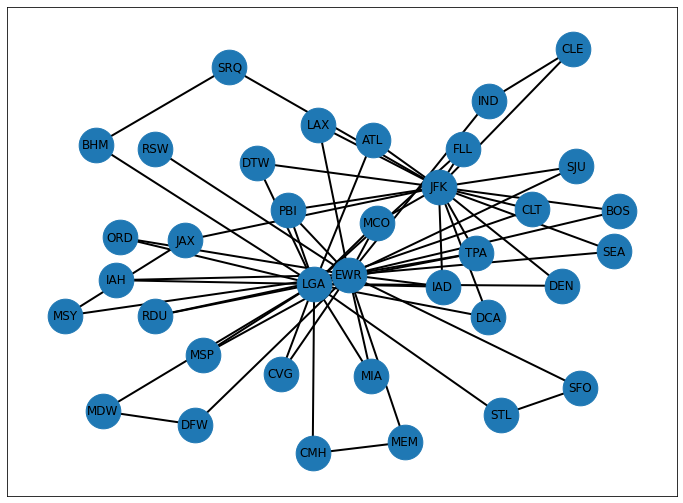

In [34]:
# After adding 6 routes, the network looks below
plt.figure(figsize=(12,9))
pos = nx.spring_layout(FG)
nx.draw_networkx_nodes(FG, pos, node_size = 1200)
nx.draw_networkx_edges(FG, pos, width = 2)
nx.draw_networkx_labels(FG, pos, font_size = 12, font_family='sans-serif')
plt.axis('on')
plt.show()